In [1]:
!pip install vaderSentiment


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 126.0/126.0 kB 925.7 kB/s eta 0:00:00


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import time

Load CSV into DataFrame

In [3]:
df = pd.read_csv("../../../data/test_data.csv")  # Load test dataset

print(df.head())


        id                                               text  \
0  gg5ic5k  Thank you for sharing I have too many looming ...   
1  ghsx6oa  Alex Jones infowars.comSaid it will make you i...   
2  gidm2by  My dizziness this second time around hasn't be...   
3  gwe8ih0                       Yay!!! Thank you for sharing   
4  gr3f1r6  Thank you for your words! I hope I can get bet...   

               author                created_utc  No_of_comments  \
0        honeycombB82  2020-12-17 16:14:54+00:00             NaN   
1        StandupGamer  2021-01-02 05:52:26+00:00             NaN   
2              mjfx28  2021-01-07 02:13:41+00:00             NaN   
3            Rachet83  2021-04-30 06:18:38+00:00             NaN   
4  itsactuallynotokay  2021-03-16 05:35:11+00:00             NaN   

   Subjectivity  Polarity  Analysis   Parent    Link  
0      0.350000  0.237500  Positive   keq6mr  keq6mr  
1      0.000000  0.000000   Neutral   kof5pv  kof5pv  
2      0.411508 -0.252381  Negative

In [4]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

Function to classify sentiment (Adjust the threshold accordingly)

In [5]:
def classify_sentiment(text):
    score = analyzer.polarity_scores(str(text))  # Ensure it is a string
    print(score)
    compound = score['compound']
    if compound >= 0.05: # If compound score is greater than or equal to 0.05, classify as positive 
        return "Positive"
    elif compound <= -0.05: # If compound score is less than or equal to -0.05, classify as negative
        return "Negative"
    else:
        return "Neutral" # If compound score is between -0.05 and 0.05, classify as neutral

Apply sentiment classification on the text column

In [6]:
# Initialize time for recording inference time
start = time.time()

df["VADER_Sentiment"] = df["text"].apply(classify_sentiment) # Apply VADER sentiment analysis

end = time.time()
inference_time = end - start

# Save computation time to CSV
time_df = pd.DataFrame({"VADER_InferenceTime (s)": [inference_time]})
time_df.to_csv("computation_time_vader.csv", index=False)

print("Inference time: ", inference_time, "seconds")
print("Inference time is saved")

{'neg': 0.048, 'neu': 0.871, 'pos': 0.081, 'compound': 0.5514}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.165, 'neu': 0.799, 'pos': 0.036, 'compound': -0.8391}
{'neg': 0.0, 'neu': 0.173, 'pos': 0.827, 'compound': 0.8617}
{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.8832}
{'neg': 0.12, 'neu': 0.828, 'pos': 0.052, 'compound': -0.699}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.082, 'neu': 0.768, 'pos': 0.151, 'compound': 0.3489}
{'neg': 0.0, 'neu': 0.956, 'pos': 0.044, 'compound': 0.0387}
{'neg': 0.034, 'neu': 0.888, 'pos': 0.078, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.164, 'neu': 0.734, 'pos': 0.102, 'compound': -0.6808}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.875}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.039, 'neu': 0.874, 'pos': 0.087, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compo

Save results into CSV

In [7]:
# Select only desired columns
result_df = df[["id", "text", "VADER_Sentiment"]]

# Save to CSV
result_df.to_csv("vader_sentiment_output.csv", index=False)

print("Sentiment analysis complete. Output saved to 'vader_sentiment_output.csv'.")

print("Output length:", len(result_df))

Sentiment analysis complete. Output saved to 'vader_sentiment_output.csv'.
Output length: 1938


Evaluation

In [8]:
import pandas as pd
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
import matplotlib.pyplot as plt

In [9]:
# Load the results
df_vader = pd.read_csv("vader_sentiment_output.csv")

y_true = df["Analysis"] # True value
y_pred = df_vader["VADER_Sentiment"] # Predicted value

Classification report

In [10]:
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

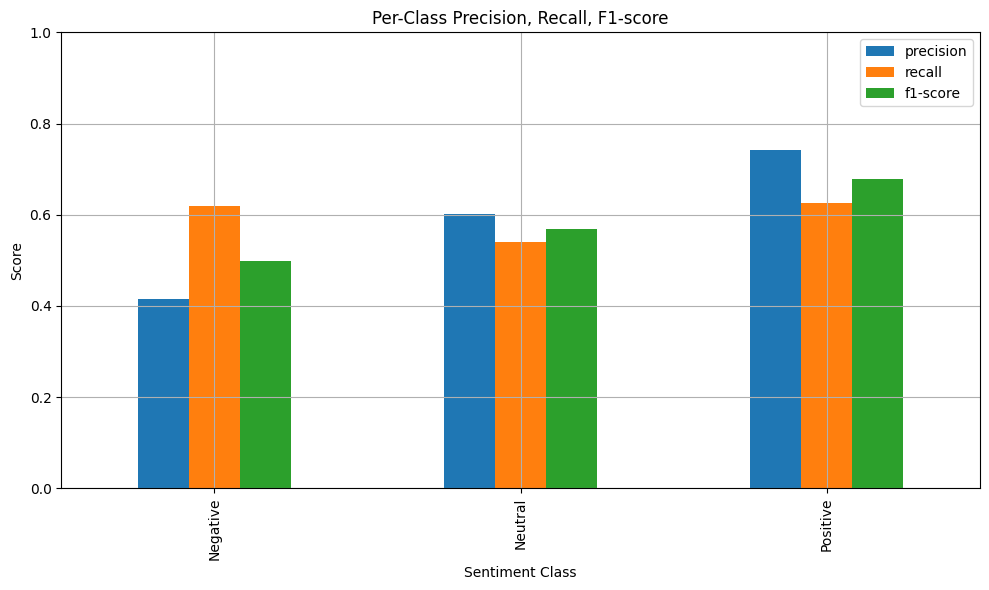

In [11]:
# Plot per-class Precision, Recall, F1-score
report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)
report_df[['precision', 'recall', 'f1-score']].plot.bar(figsize=(10,6))
report_df[['precision', 'recall', 'f1-score']].to_csv("classification_report_vader.csv") # Save classification report to CSV

plt.title("Per-Class Precision, Recall, F1-score")
plt.ylabel("Score")
plt.xlabel("Sentiment Class")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig("classification_report_vader.png") # Save classification report plot
plt.show()

Confusion Matrix

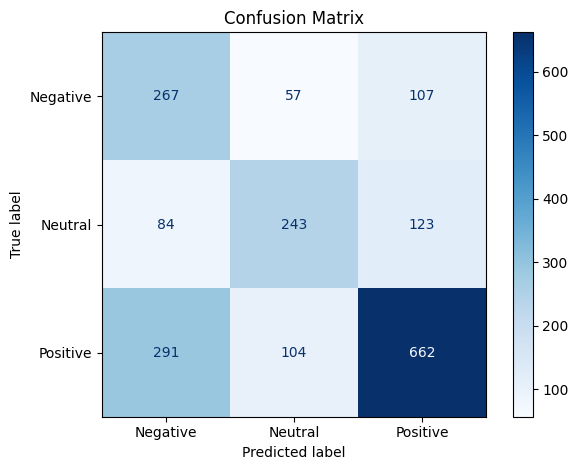

In [12]:
cm = confusion_matrix(y_true, y_pred, labels=report_df.index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=report_df.index)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix_vader.png") # Save confusion matrix plot
plt.show()

In [13]:
acc = accuracy_score(y_true, y_pred)
rounded_acc = round(acc, 4) # Round accuracy to 4 decimal places
print("Overall Accuracy:", rounded_acc)

accuracy_df = pd.DataFrame([{"Metric": "Overall Accuracy", "Score": rounded_acc}])
accuracy_df.to_csv("overall_accuracy_vader.csv", index=False) # Save overall accuracy to CSV


Overall Accuracy: 0.6047
